In [41]:
%pip install -q Pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [42]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv'
df1 = pd.read_csv(url)
df1

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
...,...,...,...,...,...
3647,2003,12,27,6,8646
3648,2003,12,28,7,7645
3649,2003,12,29,1,12823
3650,2003,12,30,2,14438


In [43]:
df1['year'] = pd.to_numeric(df1['year'])
df1 = df1.loc[df1['year'] < 2002]
df1

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
...,...,...,...,...,...
2917,2001,12,27,4,13762
2918,2001,12,28,5,13918
2919,2001,12,29,6,9365
2920,2001,12,30,7,7679


In [44]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv'
df2 = pd.read_csv(url)
df2

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [45]:
df2['year'] = pd.to_numeric(df2['year'])
df2 = df2.loc[df2['year'] > 2001]
df2

,year,month,date_of_month,day_of_week,births
731,2002,1,1,2,7927
732,2002,1,2,3,10723
733,2002,1,3,4,12465
734,2002,1,4,5,12671
735,2002,1,5,6,8902
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [46]:
DFL = pd.concat([df1, df2], axis=0)
DFL

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [47]:
DFL['day_month_year'] = DFL['date_of_month'].astype(str) + '-' + DFL['month'].astype(str)
DFL['day_month_year'] = DFL['day_month_year'].astype(str) + '-' + DFL['year'].astype(str)
DFL


,year,month,date_of_month,day_of_week,births,day_month_year
0,1994,1,1,6,8096,1-1-1994
1,1994,1,2,7,7772,2-1-1994
2,1994,1,3,1,10142,3-1-1994
3,1994,1,4,2,11248,4-1-1994
4,1994,1,5,3,11053,5-1-1994
...,...,...,...,...,...,...
5474,2014,12,27,6,8656,27-12-2014
5475,2014,12,28,7,7724,28-12-2014
5476,2014,12,29,1,12811,29-12-2014
5477,2014,12,30,2,13634,30-12-2014


In [48]:
%pip install matplotlib

       births  month
month               
1      320705      1
2      301327      2
3      339736      3
4      317392      4
5      330295      5
6      329737      6
7      345862      7
8      352173      8
9      339223      9
10     330172     10
11     319397     11
12     326748     12


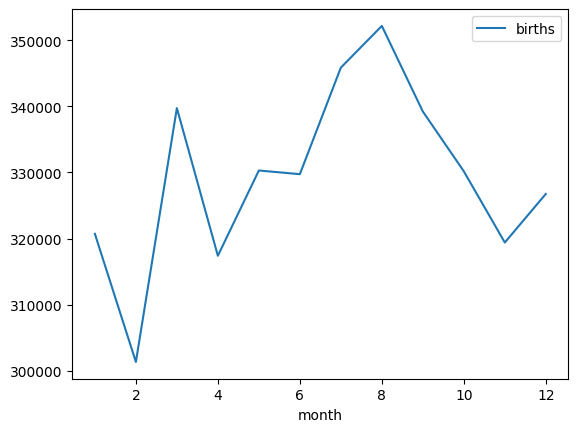

In [49]:
DFL['year'] = pd.to_numeric(DFL['year'])
Month = DFL.loc[DFL['year'] == 1994]
Month = Month.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
print(Month)
M = Month.plot(x='month', y='births', kind='line')


             births  day_of_week
day_of_week                     
1            568672            1
2            630819            2
3            619209            3
4            615942            4
5            614641            5
6            474732            6
7            428752            7


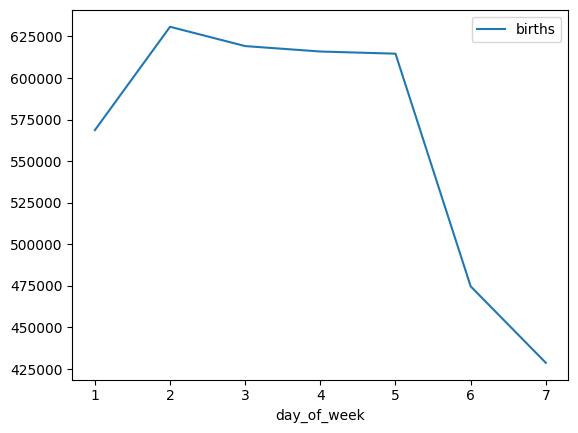

In [50]:
DFL['year'] = pd.to_numeric(DFL['year'])
Week = DFL.loc[DFL['year'] == 1994]
Week = Week.groupby(['day_of_week']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    day_of_week = pd.NamedAgg (column = 'day_of_week', aggfunc= 'min'))
print(Week)
W = Week.plot(x='day_of_week', y='births', kind='line')


,births,month
month,,
1,320705,1
12,326748,12


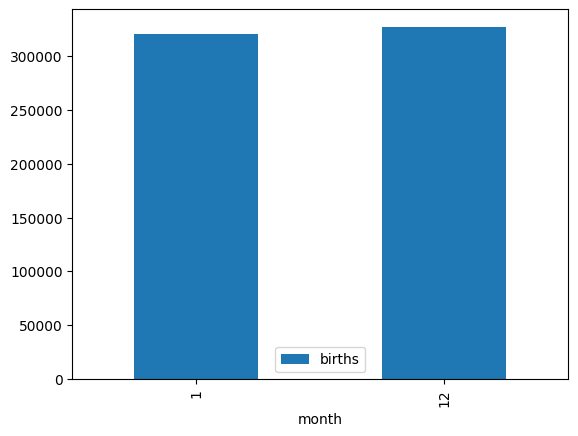

In [51]:
DFL['year'] = pd.to_numeric(DFL['year'])
FirstandLast = DFL.loc[DFL['year'] == 1994]
FandL = FirstandLast.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
FandL = FandL[FandL["month"].isin([1, 12])]
FandL.plot.bar(x='month', y='births')
FandL

In [52]:
DFL['year'] = pd.to_numeric(DFL['year'])
Everyday = DFL.loc[DFL['year'] == 1994]
Everyday = Everyday.drop(['year', 'day_of_week', 'day_month_year'], axis = 1)

<AxesSubplot: xlabel='date_of_month'>

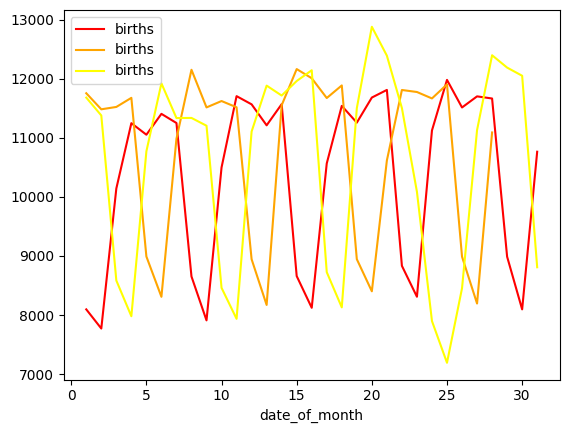

In [53]:
January = Everyday.loc[Everyday['month'] == 1]
Fabruary = Everyday.loc[Everyday['month'] == 2]
December = Everyday.loc[Everyday['month'] == 12]
ax = January.plot(x='date_of_month', y='births', kind='line', c='red')
Fabruary.plot(x='date_of_month', y='births', kind='line', c='orange', ax=ax)
December.plot(x='date_of_month', y='births', kind='line', c='yellow', ax=ax)


<AxesSubplot: xlabel='date_of_month'>

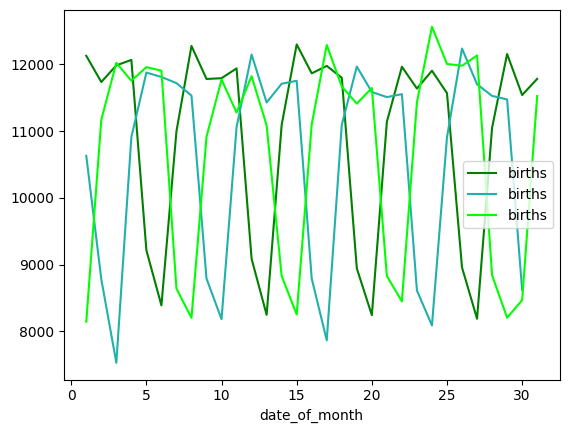

In [54]:
March = Everyday.loc[Everyday['month'] == 3]
April = Everyday.loc[Everyday['month'] == 4]
May = Everyday.loc[Everyday['month'] == 5]
ax = March.plot(x='date_of_month', y='births', kind='line', c='green')
April.plot(x='date_of_month', y='births', kind='line', c='lightseagreen', ax=ax)
May.plot(x='date_of_month', y='births', kind='line', c='lime', ax=ax)

<AxesSubplot: xlabel='date_of_month'>

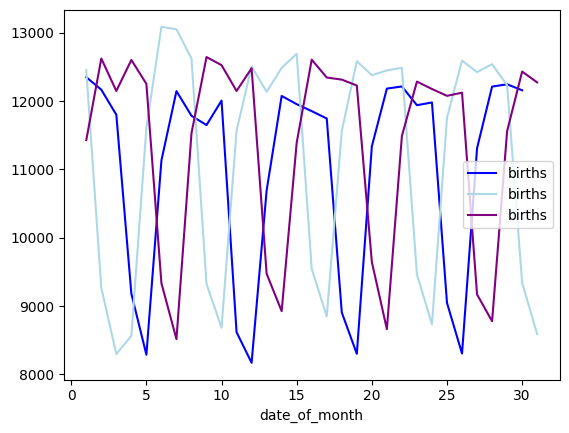

In [55]:
June = Everyday.loc[Everyday['month'] == 6]
ax = June.plot(x ='date_of_month', y ='births', kind='line', c='blue')
Jule = Everyday.loc[Everyday['month'] == 7]
Jule.plot(x ='date_of_month', y ='births', kind='line', c='lightblue', ax=ax)
August = Everyday.loc[Everyday['month'] == 8]
August.plot(x ='date_of_month', y ='births', kind='line', c='purple', ax=ax)


<AxesSubplot: xlabel='date_of_month'>

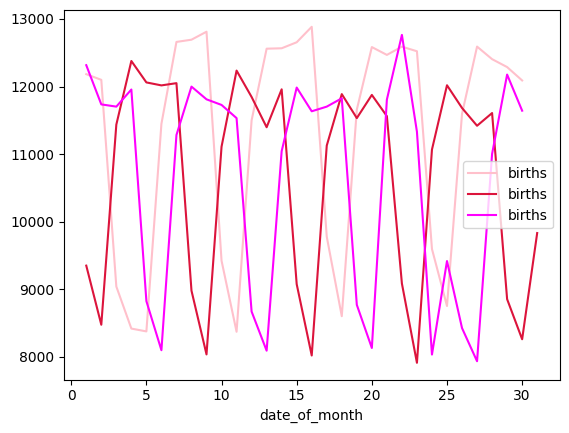

In [56]:
September = Everyday.loc[Everyday['month'] == 9]
October = Everyday.loc[Everyday['month'] == 10]
November = Everyday.loc[Everyday['month'] == 11]
ax = September.plot(x='date_of_month', y='births', kind='line', c='pink')
October.plot(x='date_of_month', y='births', kind='line', c='crimson', ax=ax)
November.plot(x='date_of_month', y='births', kind='line', c='fuchsia', ax=ax)

In [57]:
Everyyear = DFL.drop(['date_of_month', 'day_of_week', 'day_month_year'], axis = 1)

<AxesSubplot: xlabel='month'>

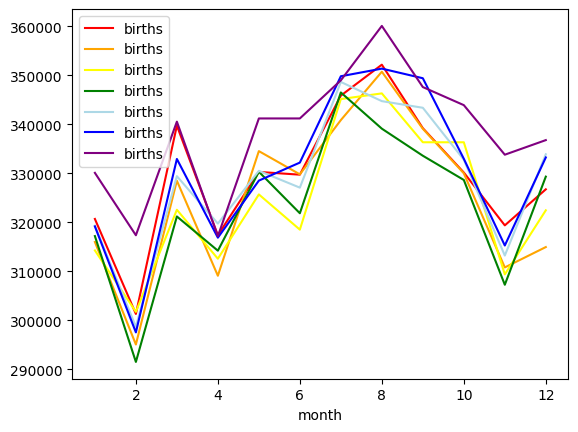

In [58]:
y1994 = Everyyear.loc[Everyyear['year'] == 1994]
Monthy1994 = y1994.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y1995 = Everyyear.loc[Everyyear['year'] == 1995]
Monthy1995 = y1995.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y1996 = Everyyear.loc[Everyyear['year'] == 1996]
Monthy1996 = y1996.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y1997 = Everyyear.loc[Everyyear['year'] == 1997]
Monthy1997 = y1997.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y1998 = Everyyear.loc[Everyyear['year'] == 1998]
Monthy1998 = y1998.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y1999 = Everyyear.loc[Everyyear['year'] == 1999]
Monthy1999 = y1999.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2000 = Everyyear.loc[Everyyear['year'] == 2000]
Monthy2000 = y2000.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
ax = Monthy1994.plot(x='month', y='births', kind='line', c='red')
Monthy1995.plot(x='month', y='births', kind='line', c='orange', ax=ax)
Monthy1996.plot(x='month', y='births', kind='line', c='yellow', ax=ax)
Monthy1997.plot(x='month', y='births', kind='line', c='green', ax=ax)
Monthy1998.plot(x='month', y='births', kind='line', c='lightblue', ax=ax)
Monthy1999.plot(x='month', y='births', kind='line', c='blue', ax=ax)
Monthy2000.plot(x='month', y='births', kind='line', c='purple', ax=ax)


<AxesSubplot: xlabel='month'>

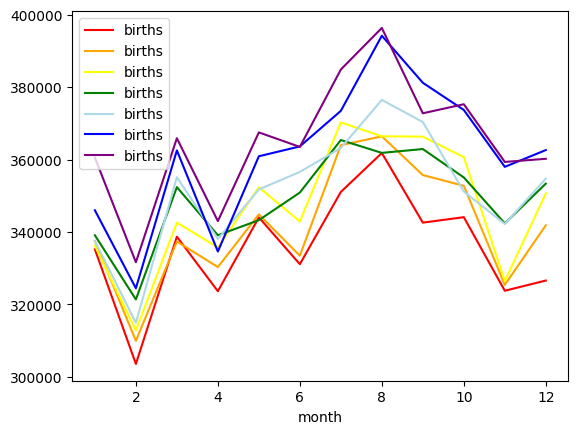

In [59]:
y2001 = Everyyear.loc[Everyyear['year'] == 2001]
Monthy2001 = y2001.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2002 = Everyyear.loc[Everyyear['year'] == 2002]
Monthy2002 = y2002.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2003 = Everyyear.loc[Everyyear['year'] == 2003]
Monthy2003 = y2003.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2004 = Everyyear.loc[Everyyear['year'] == 2004]
Monthy2004 = y2004.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2005 = Everyyear.loc[Everyyear['year'] == 2005]
Monthy2005 = y2005.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2006 = Everyyear.loc[Everyyear['year'] == 2006]
Monthy2006 = y2006.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2007 = Everyyear.loc[Everyyear['year'] == 2007]
Monthy2007 = y2007.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
ax = Monthy2001.plot(x='month', y='births', kind='line', c='red')
Monthy2002.plot(x='month', y='births', kind='line', c='orange', ax=ax)
Monthy2003.plot(x='month', y='births', kind='line', c='yellow', ax=ax)
Monthy2004.plot(x='month', y='births', kind='line', c='green', ax=ax)
Monthy2005.plot(x='month', y='births', kind='line', c='lightblue', ax=ax)
Monthy2006.plot(x='month', y='births', kind='line', c='blue', ax=ax)
Monthy2007.plot(x='month', y='births', kind='line', c='purple', ax=ax)


<AxesSubplot: xlabel='month'>

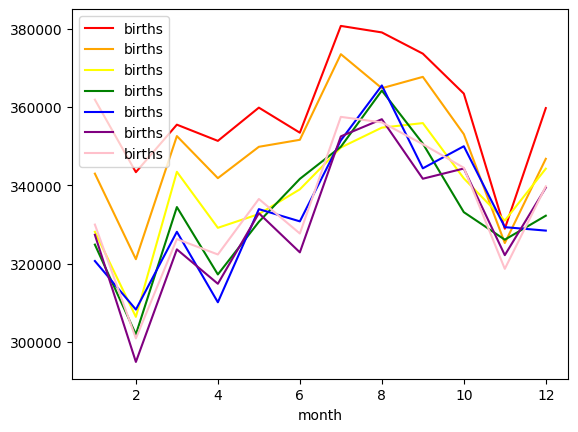

In [60]:
y2008 = Everyyear.loc[Everyyear['year'] == 2008]
Monthy2008 = y2008.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2009 = Everyyear.loc[Everyyear['year'] == 2009]
Monthy2009 = y2009.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2010 = Everyyear.loc[Everyyear['year'] == 2010]
Monthy2010 = y2010.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2011 = Everyyear.loc[Everyyear['year'] == 2011]
Monthy2011 = y2011.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2012 = Everyyear.loc[Everyyear['year'] == 2012]
Monthy2012 = y2012.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2013 = Everyyear.loc[Everyyear['year'] == 2013]
Monthy2013 = y2013.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
y2014 = Everyyear.loc[Everyyear['year'] == 2014]
Monthy2014 = y2014.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
ax = Monthy2008.plot(x='month', y='births', kind='line', c='red')
Monthy2009.plot(x='month', y='births', kind='line', c='orange', ax=ax)
Monthy2010.plot(x='month', y='births', kind='line', c='yellow', ax=ax)
Monthy2011.plot(x='month', y='births', kind='line', c='green', ax=ax)
Monthy2012.plot(x='month', y='births', kind='line', c='blue', ax=ax)
Monthy2013.plot(x='month', y='births', kind='line', c='purple', ax=ax)
Monthy2014.plot(x='month', y='births', kind='line', c='pink', ax=ax)
